# EDA(Exploratery Data Analysis)


### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [2]:
# import LIbrary
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [4]:
#load the dataset
df=pd.read_csv(r'E:\All project file\DimondPricePrediction\notebooks\data\gemstone.csv')

In [5]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [8]:
df.shape

(193573, 11)

In [9]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

report
* No missing values present in the data

In [10]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [11]:
df.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [12]:
df.color.value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [13]:
## check for duplicated records
df.duplicated().sum()

np.int64(0)

In [15]:
## segregate numerical and categorical columns
num_col=[col for col in df.columns if df[col].dtype !='object']
chr_col=[col for col in df.columns if df[col].dtype == 'object']
print('Numerical columns:',num_col)
print('Categorical columns:',chr_col)

Numerical columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical columns: ['cut', 'color', 'clarity']


In [19]:
df[num_col].shape,df[chr_col].shape

((193573, 7), (193573, 3))

In [20]:
df[num_col].describe()


,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [21]:
df[chr_col].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [22]:
df.cut.value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [23]:
df.color.value_counts()


color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [24]:
df.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

/n


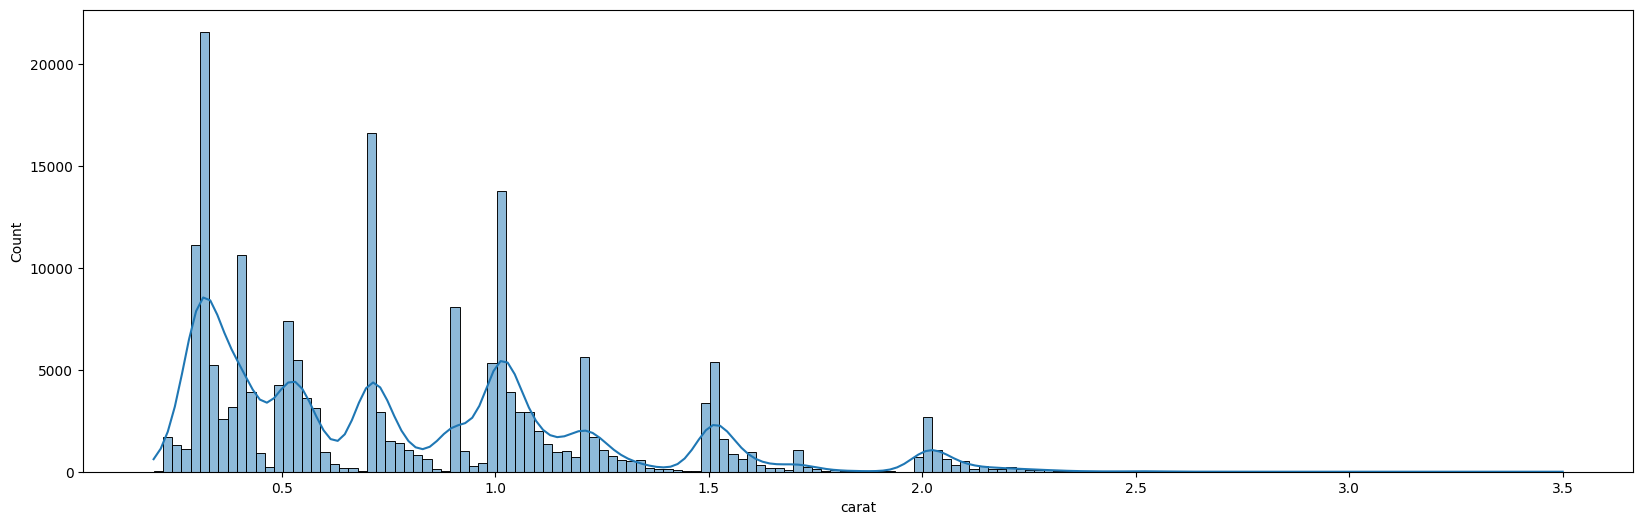

/n


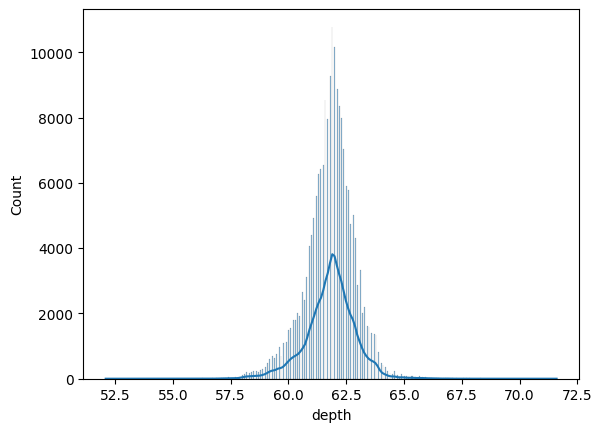

/n


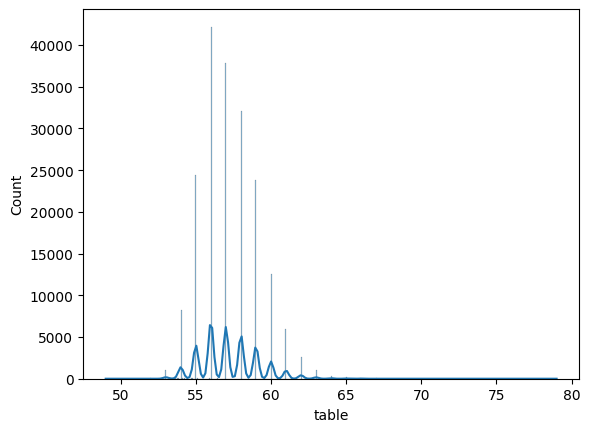

/n


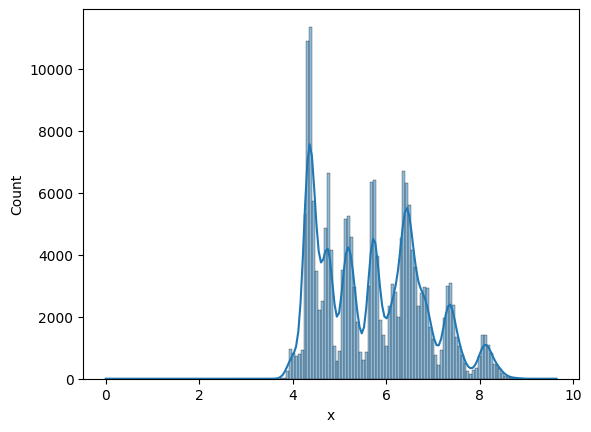

/n


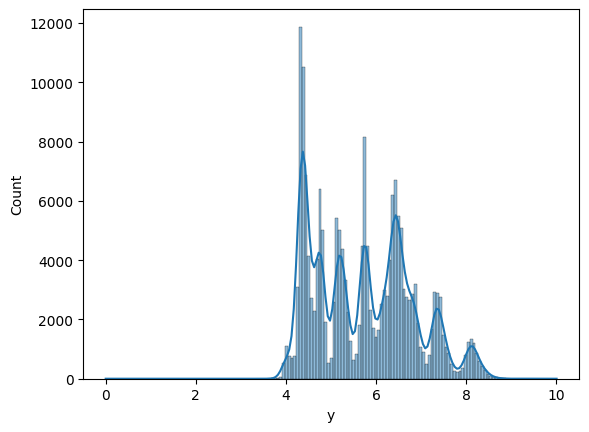

/n


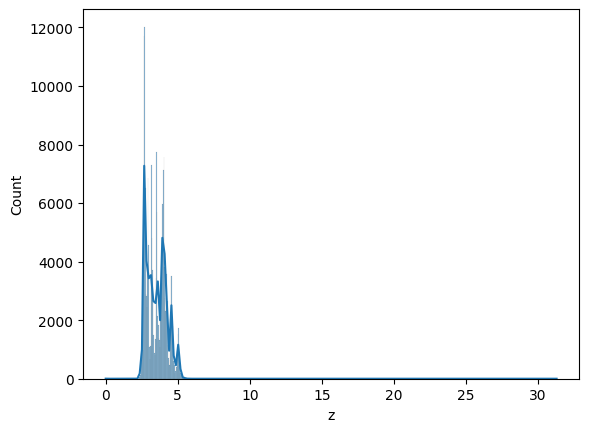

/n


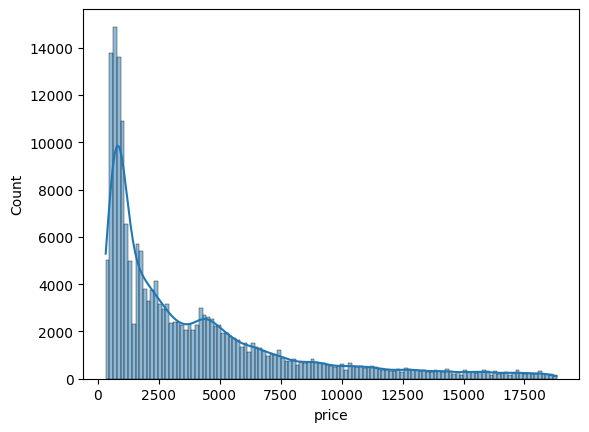

In [32]:

plt.figure(figsize=(20,6))

for i in num_col:
    sns.histplot(data=df,x=i,kde=True)
    print('/n')
    plt.show()



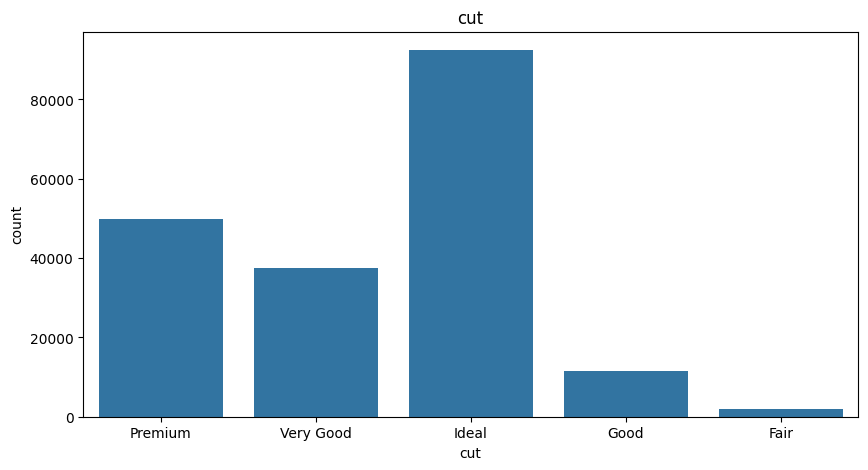

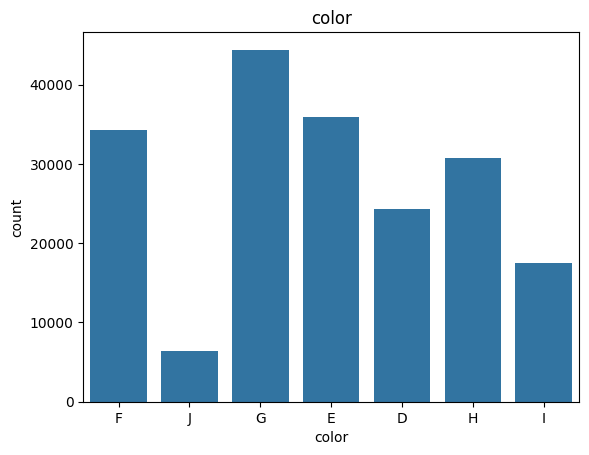

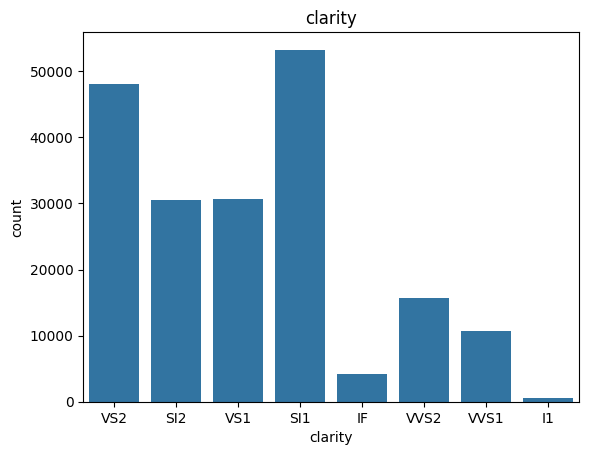

In [34]:
plt.figure(figsize=(10,5))
for col in chr_col:
    
    sns.countplot(x=col,data=df)
    plt.title(col)
    plt.show()



check corelation

<Axes: >

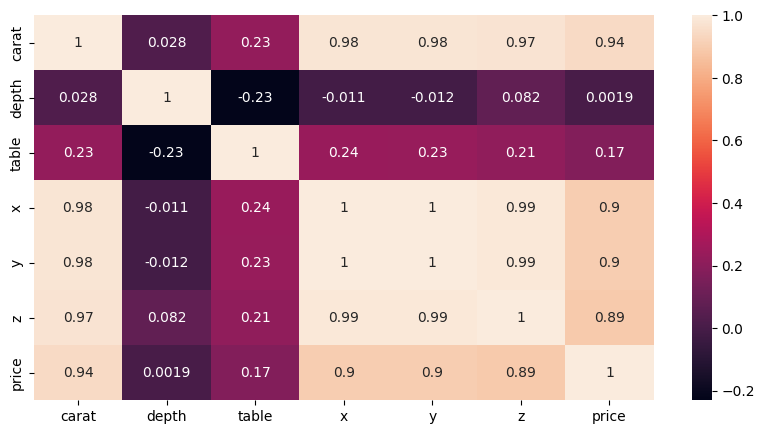

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(df[num_col].corr(),annot=True)

Report
* From the graph, we can observe that the variables x, y, z, and carat are highly correlated, with correlation values greater than 0.9.

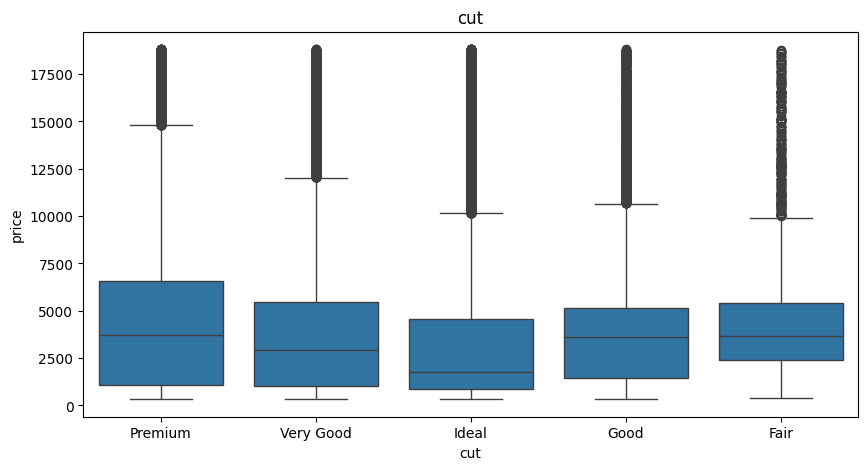

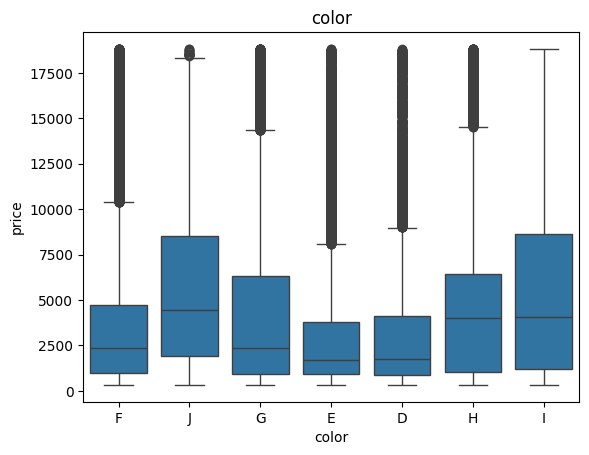

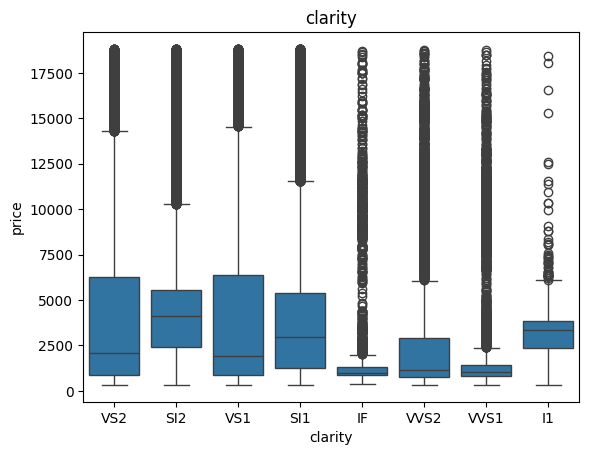

In [36]:
plt.figure(figsize=(10,5))
for col in chr_col:
    sns.boxplot(x=col,y='price',data=df)
    plt.title(col)
    plt.show()

## Exploratory Data Analysis (EDA) Report

### Data Overview:
- Dataset contains diamonds with physical characteristics and a target price.
- No missing values were found.
- ID column was dropped since it has no analytical value.

### Feature Types:
- **Numerical Features:** carat, depth, table, x, y, z, price
- **Categorical Features:** cut, color, clarity

### Distribution Insights:
- Most numerical features show right-skewed distribution.
- `carat`, `x`, `y`, and `z` are highly correlated (correlation > 0.9), indicating potential multicollinearity.
  
### Categorical Insights:
- Most diamonds have `Ideal` cut and `G` color.
- Diamond prices vary significantly across different categories of cut, color, and clarity.

### Correlation Analysis:
- High positive correlation observed between `carat` and dimensions (`x`, `y`, `z`).
- These variables might be reduced through dimensionality reduction or addressed via regularization.

### Outlier Analysis:
- Boxplots show price outliers across all categorical levels.
- These need to be considered during preprocessing or modeling.

### Next Steps:
- Encode categorical variables.
- Handle multicollinearity.
- Normalize or scale data.
- Outlier treatment if necessary.

